In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [ ]:
# Step 1: Load and Analyze Data
df = pd.read_csv("Zoo.csv")

In [ ]:
print(df.head())

  animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1  
2     4  
3     1  
4     1  


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB
None


In [ ]:
print(df.describe())

             hair    feathers        eggs        milk    airborne     aquatic  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.425743    0.198020    0.584158    0.405941    0.237624    0.356436   
std      0.496921    0.400495    0.495325    0.493522    0.427750    0.481335   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
75%      1.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         predator     toothed    backbone    breathes    venomous        fins  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.554455    0.603960    0.821782    0.792079    0.079208    0.168317   
std      0.499505    0.4915

In [ ]:
# Check for missing values
print(df.isnull().sum())

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


In [ ]:
# Separate features and target
X = df.drop(columns=["animal name", "type"])  # Drop non-feature columns
y = df["type"]


In [ ]:
# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Step 3: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Step 4: Implement KNN
k = 5
knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
knn.fit(X_train, y_train)


KNeighborsClassifier(metric='euclidean')

In [ ]:
# Step 5: Evaluate Performance
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average="weighted"))
print("Recall:", recall_score(y_test, y_pred, average="weighted"))
print("F1 Score:", f1_score(y_test, y_pred, average="weighted"))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9523809523809523
Precision: 0.9206349206349207
Recall: 0.9523809523809523
F1 Score: 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

In [ ]:
# Step 6: Visualize Decision Boundaries (using PCA for 2D visualization)
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

In [ ]:
knn_2d = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
knn_2d.fit(X_train_2d, y_train)


KNeighborsClassifier(metric='euclidean')

In [ ]:
# Plot decision boundaries
xx, yy = np.meshgrid(np.linspace(X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1, 100),
                     np.linspace(X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1, 100))
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


<ipython-input-17-dc1629ef7351>:3: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, edgecolor="k", marker="x", label="Testing Data")


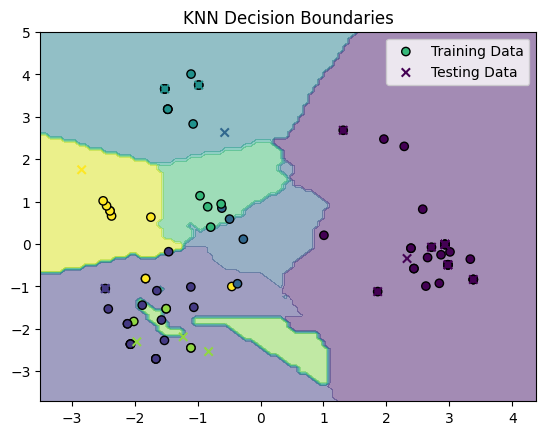

In [ ]:
plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolor="k", label="Training Data")
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, edgecolor="k", marker="x", label="Testing Data")
plt.title("KNN Decision Boundaries")
plt.legend()
plt.show()

# Interview Questions

# 1. **What are the key hyperparameters in KNN?**

Key Hyperparameters in KNN:

1. Number of Neighbors (k):

Determines how many nearest neighbors to consider for classification or regression.

A smaller k can lead to overfitting, while a larger k may oversmooth the decision boundary.

2. Distance Metric:

Defines how the distance between data points is calculated (e.g., Euclidean, Manhattan, etc.).

3. Weighting of Neighbors:

Uniform: All neighbors have equal weight.

Distance-based: Closer neighbors have higher influence.

4. Algorithm:

Determines how neighbors are searched:

* Brute Force: Searches all data points.

* KD-Tree: Efficient for low-dimensional data.

* Ball Tree: Efficient for higher dimensions.

5. Leaf Size (for KD-Tree/Ball Tree):

Affects the speed and memory of neighbor searches.



# 2. **What distance metrics can be used in KNN?**

1. Euclidean Distance:

Measures the straight-line distance between two points in space.

Commonly used when features are continuous and equally scaled.

2. Manhattan Distance:

Measures the distance by summing the absolute differences along each dimension.

Suitable for grid-like paths or when features have different scales.

3. Minkowski Distance:

A generalization of Euclidean and Manhattan distances.

Controlled by the parameter p:

p=2: Euclidean distance.

p=1: Manhattan distance.

4. Hamming Distance:

Counts the number of differing attributes between two categorical data points.

Ideal for comparing binary or categorical data.

5. Cosine Distance:

Measures the dissimilarity based on the angle between two vectors, not their magnitude.

Often used for text or high-dimensional data.

6. Mahalanobis Distance:

Accounts for correlations between variables and scales the data accordingly.
Useful when features have different variances or are correlated.

Each metric is chosen based on the type of data and problem context. For instance, Euclidean is popular for continuous data, while Hamming is better for categorical comparisons.






